# Installing the necessary packages

In [13]:
!pip install pandas matplotlib numpy

# Importing the packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [3]:
data = pd.read_csv("/content/sample_data/headbrain.csv")

# Extract Head Size (X) and Brain Weight (Y)

In [4]:
x = np.array(list(data['Head Size(cm^3)'])) # Extracting the head size
y = np.array(list(data['Brain Weight(grams)'])) # Extracting the brain weight

## Printing first N values of X and Y

In [5]:
print("Sample X:", x[:5])
print("Sample Y:", y[:5])

Sample X: [4512 3738 4261 3777 4177]
Sample Y: [1530 1297 1335 1282 1590]


# Function to compute regression line manually

**What is lambda function?**
> A lambda function in Python is just a shortcut way to write a tiny function.

In [6]:
def get_line(x, y):
    # Mean of X and Y
    x_m, y_m = np.mean(x), np.mean(y)
    print("Mean of X:", x_m, "Mean of Y:", y_m)

    # Deviations from mean
    x_d, y_d = x - x_m, y - y_m

    # Slope (m) using least squares formula
    m = np.sum(x_d * y_d) / np.sum(x_d ** 2)

    # Intercept (c)
    c = y_m - (m * x_m)

    print("Slope:", m, "Intercept:", c)

    # Return line function y = mx + c as a lambda function
    return lambda x: m * x + c

# Get the regression line function

In [7]:
lin = get_line(x, y) # Get the regression line function (y = mx + c)

Mean of X: 3633.9915611814345 Mean of Y: 1282.873417721519
Slope: 0.2634293394893993 Intercept: 325.5734210494428


# Generate points for regression line plotting

In [8]:
X = np.linspace(np.min(x) - 100, np.max(x) + 100, 1000) # Generate X values (a smooth range) for plotting the regression line
Y = np.array([lin(val) for val in X]) # Calculate predicted Y values using the regression line function

# Plot regression line and scatter points

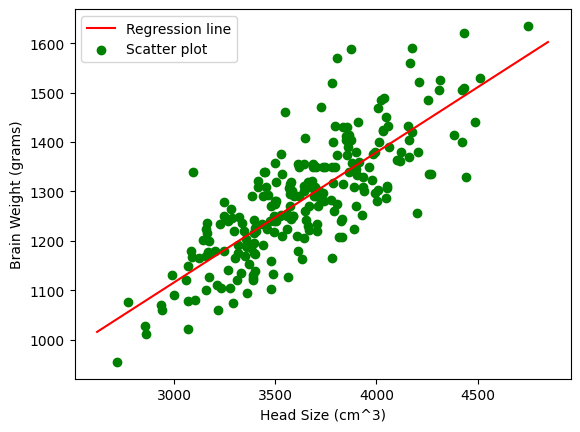

In [9]:
# Plot the regression line in red
plt.plot(X, Y, color='red', label='Regression line')

# Plot the actual data points in green
plt.scatter(x, y, color='green', label='Scatter plot')

# Label the X-axis
plt.xlabel('Head Size (cm^3)')

# Label the Y-axis
plt.ylabel('Brain Weight (grams)')

# Show legend for better understanding
plt.legend()

# Display the final plot
plt.show()

# Function to calculate R² error

In [10]:
# Function to calculate R² error manually
def get_error(line_func, x, y):
    y_m = np.mean(y)  # Mean of actual Y values

    # Predicted Y values using the regression line
    y_pred = np.array([line_func(_) for _ in x])

    # Total sum of squares (how much y varies from its mean)
    ss_t = np.sum((y - y_m) ** 2)

    # Residual sum of squares (how far predictions are from actual)
    ss_r = np.sum((y - y_pred) ** 2)

    # R² score formula = 1 - (ss_r / ss_t)
    return 1 - (ss_r / ss_t)

## Calculate R² for manual regression

In [11]:
print("R² (Manual Calculation):", get_error(lin, x, y))

R² (Manual Calculation): 0.639311719957


# Using Scikit-learn (in-built)

## Importing Scikit-learn

In [14]:
from sklearn.linear_model import LinearRegression

## Finding R² score from sklearn

In [15]:
# Reshape X into 2D array because sklearn expects (n_samples, n_features)
x = x.reshape((len(x), 1))

# Create LinearRegression model
reg = LinearRegression()

# Fit model on x and y
reg = reg.fit(x, y)

# Print R² score from sklearn model
print("R² (Sklearn):", reg.score(x, y))

R² (Sklearn): 0.639311719957
